In [1]:
import torch

In [2]:
# Create approx linear model

In [3]:
w = torch.tensor(3.0, requires_grad=True) # Slope
b = torch.tensor(1.0, requires_grad=True) # Y intercept / Bias

In [4]:
# Forward Function
def forward(x):
    '''
    recieves input to be passed into linear model
    '''
    y = w*x.float() + b
    return(y)

In [5]:
x = torch.tensor(2) # One Input
forward(x)

tensor(7., grad_fn=<ThAddBackward>)

In [6]:
x = torch.tensor([[4],[7]])# Two Inputs
forward(x)

tensor([[13.],
        [22.]], grad_fn=<ThAddBackward>)

# Standardized Way of Linear Class

In [7]:
from torch.nn import Linear

In [8]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1) # For every output, there is a single input
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [9]:
x = torch.tensor([2.0])  # This is a float
print(model(x))

tensor([0.5891], grad_fn=<ThAddBackward>)


In [10]:
# Make several predictions
x = torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<ThAddmmBackward>)


# Custom Class

In [11]:
import torch
import torch.nn as nn

In [12]:
class LR(nn.Module): # inherit
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self,x):
        '''
        For making predictions on x value
        '''
        pred = self.linear(x)
        return pred

In [13]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [14]:
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<ThAddmmBackward>)


# Training with a dataset

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%matplotlib inline

Text(0.5,0,'x')

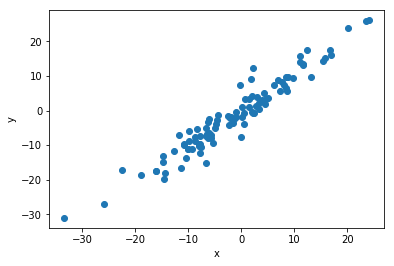

In [17]:
# Return tensor with normally distributed values, input is shape
X = torch.randn(100,1) * 10 # 100 points with a single value
y = X + 3*torch.randn(100,1) # function of x with noise
plt.scatter(X.numpy(),y.numpy(), marker='o')

plt.ylabel('y')
plt.xlabel('x')

In [18]:
# Fit the dataset

In [19]:
class LR(nn.Module): # inherit
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self,x):
        '''
        For making predictions on x value
        '''
        pred = self.linear(x)
        return pred

In [20]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [21]:
# Unpack model parameters
[w, b] = model.parameters()

def get_params():
    return (w[0][0].item(), b[0].item())

In [22]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    # has to be numpy array, not tensor
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1 # will return two y1 points
    plt.plot(x1, y1, 'r')
    plt.scatter(X,y)
    plt.show()

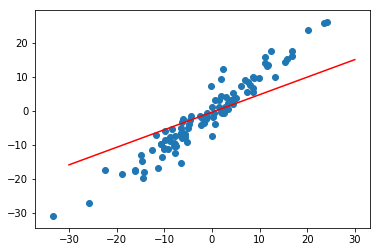

In [23]:
plot_fit('Initial Model') # need to use gradient descent to update parameters, line does not fit well.

https://www.udemy.com/pytorch-for-deep-learning-and-computer-vision/learn/lecture/13148820#content # Gradient descent in small steps (learning rate)

- Start with random weight
- next weight is the first weight minus (the derivative of the error function * the learning rate)
- keep doing this until weights converge (error approaches zero)

# Built in Loss Function (mean squared loss)

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [25]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()# Must set gradient to 0 after gradient calculation
    
    # Take gradient of loss function (derivative)
    loss.backward()
    optimizer.step() # All optimizers implement step, can be computed once gradients are calculated.
    

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 25.84706687927246
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200485229492188
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.58358097076416
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.53991031

Text(0.5,0,'epoch')

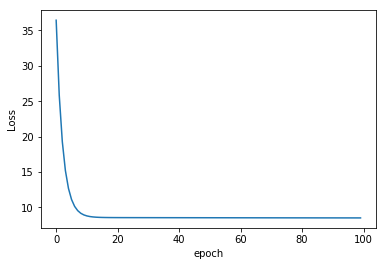

In [26]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

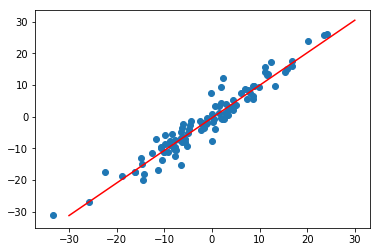

In [27]:
plot_fit("Trained Model")